In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import imutils
import easyocr

In [16]:
path = "data\\1-1\\1-1-drawing_page-0007.jpg"

In [17]:
def cropped(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 15, 20, 20)
    edged = cv2.Canny(bfilter, 30, 200)

    keypoint = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoint)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    mask = np.zeros(gray.shape, np.uint8)
    location = None

    for contour in contours:
        # print(i)
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            max_x = max(approx[:,:,1])
            min_x = min(approx[:,:,1])
            max_y = max(approx[:,:,0])
            min_y = min(approx[:,:,0])

            x_lenght = max_x-min_x
            y_lenght = max_y-min_y

            if x_lenght > 500 and y_lenght > 500:
                location = approx
                break

    if location is not None:
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        return cropped_image
    else:
        plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
        return gray

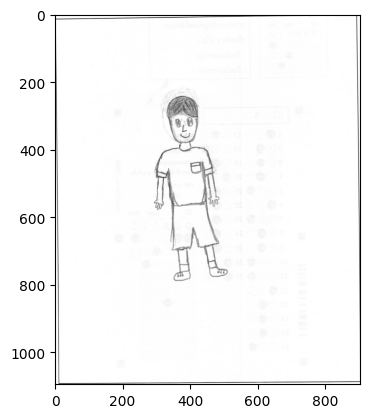

In [29]:
img = cv2.imread(path)
cropped_img = cropped(img)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [59]:
cropped_img.shape

(1095, 905)

True

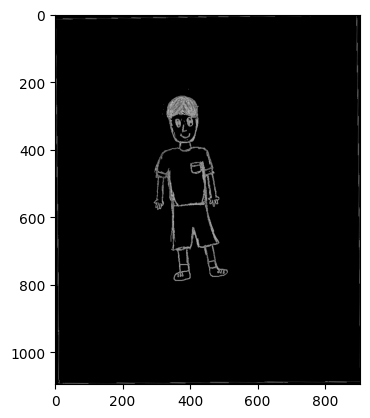

In [60]:
lower = 0  # Lower bound for the color you want to remove
upper = 200  # Upper bound for the color you want to remove

# Create a mask for the color range
mask = cv2.inRange(cropped_img, lower, upper)

# Bitwise-and the mask with the original image
result = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
cv2.imwrite('test-inrange-denoising.jpg', result)

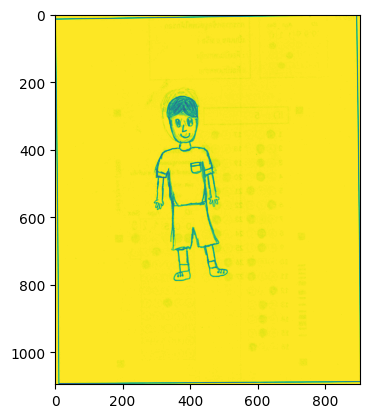

In [42]:
blurred = cv2.GaussianBlur(cropped_img, (15, 15), 0)

edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

dilated = cv2.dilate(edges, None, iterations=2)

eroded = cv2.erode(dilated, None, iterations=1)

contours, hierarchy = cv2.findContours(eroded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

mask = np.ones(cropped_img.shape[:2], dtype="uint8") * 255

# cv2.drawContours(mask, filtered_contours, -1, (0,0,255), 2)
result = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)
plt.imshow(result)

True

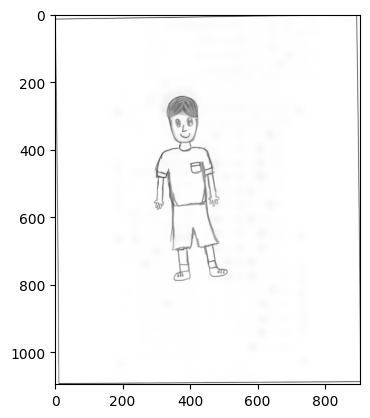

In [20]:
h = 30

dst = cv2.fastNlMeansDenoising(cropped_img,h,21,7)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
cv2.imwrite(f"test-denoising-{h}.jpg", dst)
cv2.imwrite("test.jpg", cropped_img)

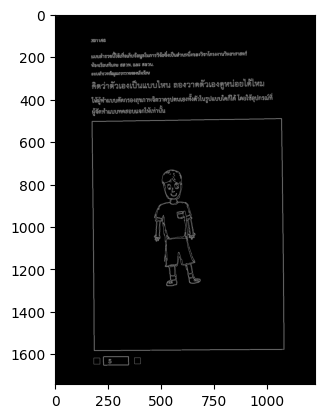

In [21]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

bfilter = cv2.bilateralFilter(gray, 15, 50, 50)
edged = cv2.Canny(bfilter, 100, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

keypoint = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoint)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:20]

In [22]:
location = None
i = 0
max_int = -1500

for contour in contours:
    i+=1
    print(i)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        # print(max(i[0]))
        # print("===========")
        max_x = max(approx[:,:,1])
        min_x = min(approx[:,:,1])
        max_y = max(approx[:,:,0])
        min_y = min(approx[:,:,0])
        wid = max_x - min_x
        hig = max_y - min_y

        print(approx)
        print(wid, " ", hig)
        print("++++++++++++++++++++++++++++++++")

        if wid > 25 and hig > 25:
            max_int = max_x
            location = approx
            print("-")


1
2
3
[[[ 228 1616]]

 [[ 343 1614]]

 [[ 345 1650]]

 [[ 230 1652]]]
[38]   [117]
++++++++++++++++++++++++++++++++
-
4
5
6
7
[[[ 560 1186]]

 [[ 564 1229]]

 [[ 545 1231]]

 [[ 539 1192]]]
[45]   [25]
++++++++++++++++++++++++++++++++
8
[[[ 182 1619]]

 [[ 182 1648]]

 [[ 211 1648]]

 [[ 210 1619]]]
[29]   [29]
++++++++++++++++++++++++++++++++
-
9
[[[ 182 1620]]

 [[ 209 1619]]

 [[ 211 1647]]

 [[ 183 1648]]]
[29]   [29]
++++++++++++++++++++++++++++++++
-
10
[[[ 373 1618]]

 [[ 373 1646]]

 [[ 402 1646]]

 [[ 401 1618]]]
[28]   [29]
++++++++++++++++++++++++++++++++
-
11
[[[ 373 1619]]

 [[ 400 1618]]

 [[ 402 1645]]

 [[ 375 1647]]]
[29]   [29]
++++++++++++++++++++++++++++++++
-
12
[[[ 636 1175]]

 [[ 620 1180]]

 [[ 627 1222]]

 [[ 645 1216]]]
[47]   [25]
++++++++++++++++++++++++++++++++
13
14
[[[ 635 1175]]

 [[ 645 1216]]

 [[ 628 1222]]

 [[ 620 1181]]]
[47]   [25]
++++++++++++++++++++++++++++++++
15
16
17
18
19
20


In [23]:
location = None
i = 0
mask = np.zeros(gray.shape, np.uint8)

for contour in contours:
    i+=1
    print(i)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        location = approx
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]

        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_image)

        if (result!=[]):
            break


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


1
2
3


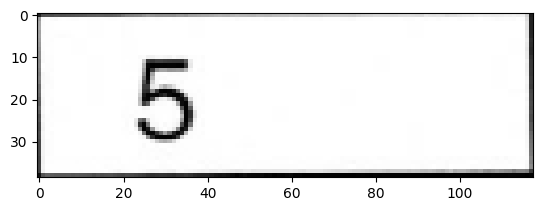

In [24]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


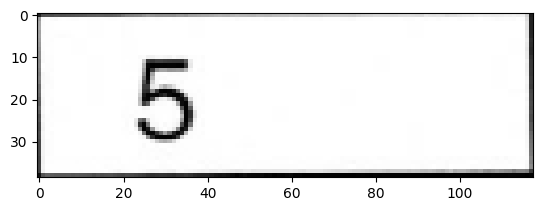

In [25]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [26]:
result[0][1]

'5'

In [27]:
# original_img = cv2.imread(path)
# Id = result[0][1].rjust(3, '0')
# cv2.imwrite(f'data_label\\{Id}.jpg', original_img)